# Constraints on the PBH abundance

Compute the forecasted bounds on the PBH abundance for several future experiments

In [1]:
from Source.chi2 import *
from Source.experiments import *

# Bounds on the PBH abundance from other probes (write elsewhere, and check if it is at 90 CL)

# Gamma ray PBH bound, for f_pbh, from Carr et al 2020
def boundgamma_DM(M):
    ep = 0.2
    return 2.e-8*(M/5e14)**(3+ep)

# Gamma ray PBH bound, for beta', from Carr et al 2020
def boundgamma_evap(M):
    ep = 0.2
    return 3.e-27*(M/5e14)**(-5./2.-2.*ep)

# Bound from CMB anisotropies, for beta', from Carr et al 2020
def boundcmb_ani(M):
    if M>=2.5e13 and M<= 2.4e14:
        return 3.e-30*(M/1e13)**(3.1)
    else:
        return None

boundcmb_ani = np.vectorize(boundcmb_ani)

# Bound from BBN, for beta', from Carr et al 2020
mBBN, betaBBN = np.loadtxt("data/BBNbounds.txt", unpack=True, delimiter=";")
logboundBBN = interp1d(np.log10(mBBN), np.log10(betaBBN), fill_value="extrapolate")
boundBBN = lambda logM: 10.**(logboundBBN(np.log10(logM)))

def plot_pbh_bounds(Mpbhs, fpbhs, is_DM, mass_spec = 0, sig = 0):

    exps = [HK]
    cols = ["r", "orange", "g", "yellow", "cyan"]

    # Compute fluxes (comment if already computed)
    compute_flux(Mpbhs, is_DM, mass_spec, sig)  # fpbhs not used here actually

    fig, ax = plt.subplots(figsize=(9,6))

    # Compute the bound for each experiment considered
    for ie, exp in enumerate(exps):

        # Compute event rate
        compute_events(Mpbhs, fpbhs, exp, is_DM, mass_spec, sig)  # fpbhs not used here actually

        fpbh_bounds = pbh_bounds_chi2(Mpbhs, fpbhs, exp, is_DM, mass_spec, sig)
        
        if is_DM:
            plt.plot(Mpbhs, fpbh_bounds, color=cols[ie],linestyle='-',linewidth=3, label=exps[ie].name)
        else:
            plt.plot(Mpbhs, fpbh_bounds, color=cols[ie],linestyle='-',linewidth=3, label=exps[ie].name)
       
    if is_DM:
        
        # SK bound, from complete analysis
        mSK, foo1, boundSK = np.loadtxt("data/SignalCLSK_mc_DM.dat", unpack=True)
        plt.plot(mSK, boundSK, color="b", linestyle="--", lw=4, label=r"SK")

        # EGRB bound
        plt.plot(Mpbhs, boundgamma_DM(Mpbhs), color="m", linestyle="--", lw=4, label=r"$\gamma$ rays")
        
    else:
        
        # SK bound, from complete analysis
        mSK, foo1, boundSK = np.loadtxt("data/SignalCLSK_mc_evap.dat", unpack=True)
        plt.plot(mSK, boundSK, color="b", linestyle="--", lw=4, label=r"SK")
        
        # EGRB + BBN bounds
        plt.plot(Mpbhs, np.min([boundBBN(Mpbhs),boundgamma_evap(Mpbhs)],axis=0), color="m", linestyle="--", lw=4, label=r"$\gamma$ rays + BBN")

        
    if is_DM:
        plt.ylabel(r'$  f_{\rm PBH} $')
        plt.xlabel(r'$ M_{\rm PBH} $'+' [g]')
        plt.xlim(Mpbhs[0], Mpbhs[-1])
        plt.xscale("log")
        sufix = "DM"
        #plt.xscale("log")
    else:
        plt.ylabel(r"$  \beta' $")
        plt.xlabel(r'$ M_{\rm PBH} $'+' [g]')
        plt.xlim(Mpbhs[0], Mpbhs[-1])
        sufix = "evaporated"
        plt.xscale("log")
        
    if mass_spec==0:
        sufix += "_mc"
    elif mass_spec==1:
        sufix += "_ln_sig_{:.1e}".format(sig)

    plt.legend()#loc='lower right',frameon=False)
    plt.ylim(fpbhs[0], fpbhs[-1])
    plt.yscale("log")
    plt.tick_params(axis='both', which='both', top=True, right=True, direction="in")
    plt.grid(which="major",linestyle=":",linewidth=1)

    plt.tight_layout()
    plt.savefig("figures/PBH_boundstest_"+sufix+".png", bbox_inches='tight', dpi=300)
    plt.show()


## Compute bounds on the abundance of PBHs as Dark Matter

Mass: 8.0e+14 g
Mass: 9.6e+14 g
Mass: 1.1e+15 g
Mass: 1.4e+15 g
Mass: 1.6e+15 g
Mass: 2.0e+15 g
Mass: 2.4e+15 g
Mass: 2.8e+15 g
Mass: 3.4e+15 g
Mass: 4.1e+15 g
Mass: 4.9e+15 g
Mass: 5.8e+15 g
Mass: 7.0e+15 g
Mass: 8.3e+15 g
Mass: 1.0e+16 g


/Users/omena/Downloads/NeutrinosFromPBHs/nuHawk_github/Source/experiments.py:289: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  eventsbin.append( integrate.quad( eventsint, Eb, Eb+self.bin, limit=400, epsrel= 1e-5 )[0] )
/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


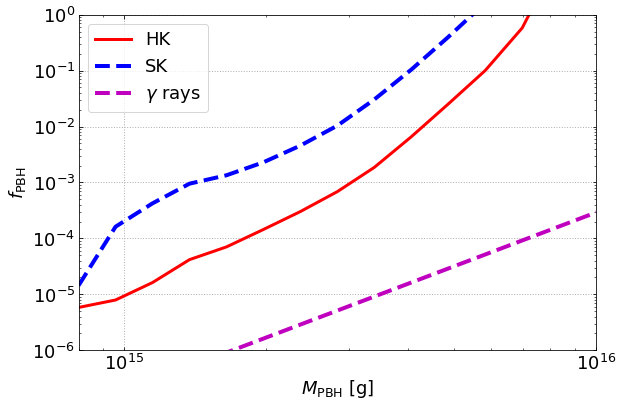

In [2]:
#Mpbhs = np.array([1.e15, 2.e15, 4.e15, 6.e15, 8.e15])
Mpbhs = np.logspace(np.log10(8.e14), np.log10(1.e16), 15)
fpbhs = np.logspace(-6, 0, 20)

plot_pbh_bounds(Mpbhs, fpbhs, is_DM=1)

## Compute bounds on the primordial abundance of evaporated PBHs